In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(10000, 28, 28)

In [3]:
test_image  = x_test / x_test.max()

test_image_reshape = test_image.reshape(test_image.shape[0],test_image.shape[1]*test_image.shape[2]).astype('float32')
test_target = tf.keras.utils.to_categorical(y_test)


In [18]:
model = tf.keras.models.load_model('/content/drive/MyDrive/YGL/10.27/model_result/MNIST_model/10.2805-0.0687.hdf5')

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.evaluate(test_image_reshape)

313/313 [==============================] - 0s 874us/step - loss: 0.0000e+00 - categorical_accuracy: 0.0000e+00


[0.0, 0.0]

In [36]:
image = test_image_reshape[4].reshape(1,test_image_reshape.shape[1])
image.shape

(1, 784)

In [39]:
Y_prediction = model.predict(test_image_reshape[4].reshape(1,test_image_reshape.shape[1]))
Y_prediction

array([[1.2381030e-09, 6.8384105e-07, 7.9246938e-09, 7.7494017e-10,
        9.9994278e-01, 2.3048234e-09, 1.1402203e-08, 4.9812470e-06,
        4.6749967e-08, 5.1424944e-05]], dtype=float32)

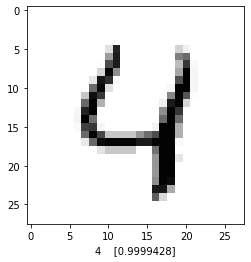

In [42]:
index=np.argmax(Y_prediction)
vlaue=Y_prediction[:, index]
plt.imshow(image.reshape(28,28), cmap='Greys')
plt.xlabel(str(index)+"    " +str(vlaue))
plt.show()

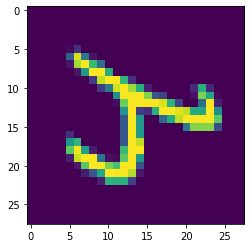

In [48]:
rotation = cv2.getRotationMatrix2D((28/2,28/2),90,1)
rotation_image = cv2.warpAffine(test_image[6],rotation,(28,28))
plt.imshow(rotation_image)
plt.show()

In [49]:
reshape_rotation_image = rotation_image.reshape(1,28*28)

predict_reshape = model.predict(reshape_rotation_image)

predict_reshape.argmax()

8

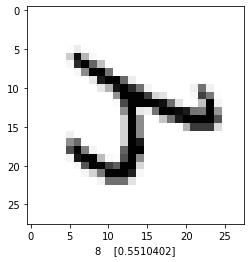

In [50]:
index=np.argmax(predict_reshape)
vlaue=predict_reshape [:, index]
plt.imshow(rotation_image, cmap='Greys')
plt.xlabel(str(index)+"    " +str(vlaue))
plt.show()